In [1]:
# Basics Importation 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

# For Detailed Stats Output
import statsmodels.api as sm
# The linear regression models 
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, LassoCV, ElasticNetCV
# Instantiating the linear regression models
ols = LinearRegression()
ridge = Ridge()
lasso  = Lasso()
lassocv = LassoCV()
elasticnet = ElasticNet()
elasticnetcv = ElasticNetCV()
# The tree model
from sklearn import tree
# Instantiating the tree model (regression type)
regressor = tree.DecisionTreeRegressor()
# The ensemble model for random forest and bagging
from sklearn import ensemble
# Instantiating the ensemble models
randomForest = ensemble.RandomForestRegressor()
bagging      = ensemble.BaggingRegressor()
gbm          = ensemble.GradientBoostingRegressor()
abr          = ensemble.AdaBoostRegressor()
# xg boost
import xgboost as xgb
# lg boost
import lightgbm as lgb

# The model selection for cross validation, k fold splits, train_test_split, grid search etc. 
import sklearn.model_selection as ms
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
# Some automatic feature selection functions (recursive finding, best feature selection etc.)
import sklearn.feature_selection as fs
# Importing the different error evaluation/metrics
from sklearn import metrics
# regression metrics: 
# metrics.explained_variance_score(y_true, y_pred)
# metrics.max_error(y_true, y_pred)
# metrics.mean_absolute_error(y_true, y_pred)
# metrics.mean_squared_error(y_true, y_pred[, …])
# metrics.mean_squared_log_error(y_true, y_pred)
# metrics.median_absolute_error(y_true, y_pred)
# metrics.r2_score(y_true, y_pred[, …])

# Making it so that we can see all columns of the dataframe
pd.set_option('display.max_columns', None)
# Importing the data
# baseline_df have nominal categories dummified.
baseline_df=pd.read_csv('baseline_df.csv',index_col='Id')
undummified_baseline_df=pd.read_csv('undummified_baseline_df.csv',index_col='Id')

standardized_baseline_df=pd.read_csv('standardized_baseline_df.csv',index_col='Id')
normalized_baseline_df=pd.read_csv('normalized_baseline_df.csv',index_col='Id')

standardized_undummified_baseline_df=pd.read_csv('standardized_undummified_baseline_df.csv',index_col='Id')
normalized_undummified_baseline_df=pd.read_csv('normalized_undummified_baseline_df.csv',index_col='Id')

standardized_with_outlier_dummified_baseline_df=pd.read_csv('standardized_with_outlier_dummified_baseline_df.csv',index_col='Id')
normalized_with_outlier_dummified_baseline_df=pd.read_csv('normalized_with_outlier_dummified_baseline_df.csv',index_col='Id')

standardized_with_outlier_undummified_baseline_df=pd.read_csv('standardized_with_outlier_undummified_baseline_df.csv',index_col='Id')
normalized_with_outlier_undummified_baseline_df=pd.read_csv('normalized_with_outlier_undummified_baseline_df.csv',index_col='Id')

all_standardized_baseline_df=pd.read_csv('all_standardized_baseline_df.csv',index_col='Id')
all_normalized_baseline_df=pd.read_csv('all_normalized_baseline_df.csv',index_col='Id')

with_outlier_dummified_baseline_df=pd.read_csv('with_outlier_dummified_baseline_df.csv',index_col='Id')
with_outlier_undummified_baseline_df=pd.read_csv('with_outlier_undummified_baseline_df.csv',index_col='Id')

all_standardized_with_outlier_dummified_baseline_df=pd.read_csv('all_standardized_with_outlier_dummified_baseline_df.csv',index_col='Id')
all_normalized_with_outlier_dummified_baseline_df=pd.read_csv('all_normalized_with_outlier_dummified_baseline_df.csv',index_col='Id')

undummified_grouped_baseline_df=pd.read_csv('undummified_grouped_baseline_df',index_col='Id')
purged_dummified_grouped_baseline_df=pd.read_csv('purged_dummified_grouped_baseline_df',index_col='Id') #

##############################################
# Specify which dataframe to work with:
##############################################
df=purged_dummified_grouped_baseline_df
print(df.isnull().sum().sum())
df.sample(10)

0


,SalePrice,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,GarageQual,GarageCond,MoSold,YrSold,MSZoning__1,MSZoning__2,LotConfig__1,LotConfig__2,Neighborhood__1,Neighborhood__2,Neighborhood__3,Neighborhood__4,Neighborhood__5,Neighborhood__6,Neighborhood__7,Neighborhood__8,Neighborhood__9,Neighborhood__10,Neighborhood__11,Neighborhood__12,Neighborhood__13,Neighborhood__14,Neighborhood__15,Neighborhood__16,Neighborhood__17,Neighborhood__18,Neighborhood__19,Neighborhood__20,Neighborhood__21,Neighborhood__22,Neighborhood__23,Condition2__1,Condition2__2,Condition2__3,Condition2__4,BldgType__1,BldgType__2,HouseStyle__1,HouseStyle__2,HouseStyle__3,HouseStyle__4,RoofMatl__1,RoofMatl__2,RoofMatl__3,RoofMatl__4,Exterior1st__1,Exterior1st__2,Exterior1st__3,Exterior1st__4,Exterior1st__5,Exterior1st__6,Exterior1st__7,Exterior2nd__1,Exterior2nd__2,Exterior2nd__3,Exterior2nd__4,Exterior2nd__5,Exterior2nd__6,Exterior2nd__7,MasVnrType__1,MasVnrType__2,Foundation__1,Foundation__2,Foundation__3,BsmtFinType1__1,BsmtFinType1__2,BsmtFinType1__3,BsmtFinType1__4,BsmtFinType1__5,BsmtFinType1__6,Heating__1,Heating__2,GarageType__1,GarageType__2,GarageType__3,GarageFinish__1,GarageFinish__2,GarageFinish__3,Fence__1,Fence__2,SaleCondition__1,SaleCondition__2,MSSubClass__1,MSSubClass__2,MSSubClass__3,MSSubClass__4,MSSubClass__5,MSSubClass__6,MSSubClass__7,MSSubClass__8,MSSubClass__9
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
253,12.061053,-0.052389,-0.191992,0.108278,-0.551312,1.156973,0.984964,-0.576817,1.350227,-0.224563,0.716674,0.134859,-0.532952,-0.507035,0.943033,-0.940334,1.384971,0.695300,-0.781870,-0.251353,0.991303,1.289016,0.294977,0.948645,-0.125797,-0.851108,-0.876370,1.124939,0.508623,0.447828,0.286395,0.283633,2.128867,0.120188,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
638,11.440366,-0.951855,-0.815783,-0.708854,-1.454066,-0.526930,-1.404294,-0.576817,-0.626310,-0.224563,-0.477783,0.134859,-0.532952,-0.468206,-1.130786,-0.894602,0.694691,0.023481,-0.781870,-0.251353,0.991303,-0.724036,0.294977,0.948645,0.616162,-0.851108,-0.876370,-0.961650,-0.931883,-0.952319,0.286395,0.283633,1.756859,0.876813,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
754,12.526347,0.847077,0.302084,1.742543,-0.551312,1.190651,1.032749,0.776729,1.350227,-0.224563,0.716674,0.134859,0.478824,0.185912,-0.093877,-0.096040,1.950690,1.911479,-0.781870,-0.251353,0.991303,1.289016,0.294977,2.597577,1.358120,0.811426,1.395181,1.166671,1.949129,2.346512,0.286395,0.283633,-1.219207,-1.393061,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
38,11.938200,0.487291,-0.148226,-0.708854,0.351443,-0.526930,0.315972,4.365906,-0.626310,-0.224563,-0.477783,0.134859,-0.532952,0.983398,-0.093877,0.815095,-0.800052,-0.215506,-0.781870,3.766983,-0.923535,-0.724036,0.294977,-0.700287,-0.867756,0.811426,0.827293,-0.961650,0.508623,0.331149,0.286395,0.283633,1.384850,0.876813,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
877,11.792457,1.686579,4.268933,-1.525986,-0.551312,-0.223828,-0.974227,-0.576817,-0.626310,-0.224563,-0.477783,0.134859,2.502377,0.287464,-0.093877,-0.089004,-0.800052,-0.897947,1.189027,-0.251353,-0.923535,-0.724036,0.294977,-0.7

In [2]:
nominal_var_processed=['MSZoning','Street','Alley','LotShape','LandContour','LotConfig','LandSlope',\
             'Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl',\
             'Exterior1st','Exterior2nd','MasVnrType','Foundation',\
             'BsmtFinType1','Heating','CentralAir',\
             'Electrical','Functional','GarageType','GarageFinish',\
             'PavedDrive','Fence','MiscFeature','SaleType','SaleCondition','MSSubClass',\
             'WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea']
ordinal_var_processed=['OverallQual','OverallCond','BsmtFullBath','BsmtHalfBath','FullBath',\
             'HalfBath','BedroomAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars',\
             'MoSold','YrSold','HeatingQC','KitchenQual','ExterQual','ExterCond','BsmtQual',\
             'BsmtCond','BsmtExposure','FireplaceQu','GarageQual','GarageCond']
cont_var_processed=['LotFrontage','LotArea','YearBuilt','YearRemodAdd','MasVnrArea','TotalBsmtSF',\
          '1stFlrSF','2ndFlrSF','GrLivArea','GarageYrBlt','GarageArea']
cont_var_for_tuning=ordinal_var_processed+cont_var_processed

In [3]:
x=df.drop('SalePrice',axis='columns')
y=df.SalePrice

# Train Test Split (ALL FEATURES)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

# Train Test Split (ONLY CONT. AND ORDINAL)
# x_train, x_test, y_train, y_test = train_test_split(x[cont_var_for_tuning], y, test_size=0.3, random_state=0)

# Grid Search CV - Single Decision Tree

In [4]:
# min_samples_leaf = minimum number of observations at each node
# min_samples_split = minimum number of observations to qualify for a split at a node
grid_para_tree = [{
    "min_samples_leaf": range(1, 13),
    "min_samples_split": np.linspace(start=2, stop=31, num=30, dtype=int)  
}]
# criterion = mse, uses mean squared error to measure the quality of the split  
# splitter = best is greedy split
# max_features = None, all features are considered at each split.
regressor.set_params(criterion="mse",splitter="best")
# scoring uses mse (mean squared error) as the metric for finding the best parameters
# n_jobs = -1 means to run in parallel
grid_search_tree = GridSearchCV(regressor, grid_para_tree, cv=5, scoring='neg_mean_squared_error', n_jobs=-1,refit=True)
# timed fitting
%time grid_search_tree.fit(x_train, y_train)
# Print results    
print('Best parameters: {}'.format(grid_search_tree.best_params_))
print('Best MSE Score: {0:.3f}'.format(-grid_search_tree.best_score_)) # NOTE: it is negated! (Sklearn convention)
print('MSE Score on training data set (using best parameters): {0:.3f}'.format(-grid_search_tree.score(x_train, y_train)))
print('MSE Score on test data set (using best parameters): {0:.3f}'.format(-grid_search_tree.score(x_test, y_test)))

CPU times: user 1.45 s, sys: 222 ms, total: 1.67 s
Wall time: 4.74 s
Best parameters: {'min_samples_leaf': 9, 'min_samples_split': 31}
Best MSE Score: 0.011
MSE Score on training data set (using best parameters): 0.007
MSE Score on test data set (using best parameters): 0.016


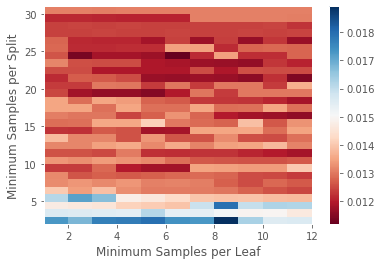

In [5]:
xplot=list(grid_para_tree[0]['min_samples_leaf'])
yplot=list(grid_para_tree[0]['min_samples_split'])
zplot=-1*grid_search_tree.cv_results_['mean_test_score'].reshape(len(yplot),-1) # NOTE: it is negated! (Sklearn convention)
plt.pcolor(xplot,yplot,zplot,cmap='RdBu')
plt.colorbar();
plt.xlabel('Minimum Samples per Leaf');
plt.ylabel('Minimum Samples per Split');

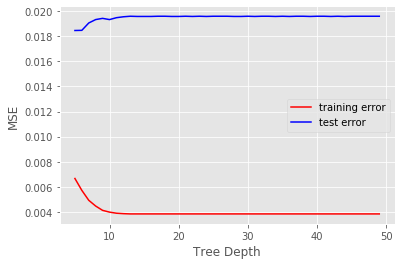

In [6]:
depth = range(5, 50)
train_error = []
test_error = []
for i in depth:
    regressor.set_params(criterion="mse",splitter="best",max_depth=i, min_samples_leaf=5)
    regressor.fit(x_train, y_train)
    train_error.append(metrics.mean_squared_error(y_train, regressor.predict(x_train))) 
    test_error.append(metrics.mean_squared_error(y_test, regressor.predict(x_test))) 
import matplotlib.pyplot as plt
plt.plot(depth, train_error, c='red', label='training error')
plt.plot(depth, test_error, c='blue', label='test error')
plt.ylabel('MSE')
plt.xlabel('Tree Depth')
plt.legend()
plt.show()


# Tree Bagging (Bagging of Single Decision Tree )

In [7]:
# Single bagging of one type of tree regressor (use optimal parameters for the tree):

# bagging = bootstrap n_estimator number of samples from a subset of total dataset, fit model at each bootstrap sample.
# The fit model is tested with the remaining subset of data, the test data set. 
# base_estimator = the type of fit model/estimator to use. decision tree, linear regression etc. 
# n_estimator = number of trees built/bagged
# bootstrap = True to sample with replacement.
# max_samples = percent of the dataset for bootstrapping
# max_features = percent of features to draw from X to train for each bootstrap sample.
# oob_score = True, whether to use out of bag sample to estimate error
# warm_start = When set to True, reuse the solution of the previous call to fit and add more estimators to the ensemble, otherwise, just fit a whole new ensemble.
# n_jobs = -1. The number of jobs to run in parallel. -1 means to run all processors
# random_state: seed for the random boostrap sampling
bagging = ensemble.BaggingRegressor()
bagging.set_params(base_estimator=tree.DecisionTreeRegressor(criterion="mse",splitter="best",\
                                                             min_samples_leaf=2,min_samples_split=15),\
                   n_estimators = 500, bootstrap=True,\
                   max_samples=0.6,max_features=0.5,\
                   oob_score = True,n_jobs=-1,random_state=0)
bagging.fit(x_train,y_train)
print("The training error of bagging forest is: {0:.3f}".format(metrics.mean_squared_error(y_train, bagging.predict(x_train))))
print("The test error of bagging forest is: {0:.3f}".format(metrics.mean_squared_error(y_test, bagging.predict(x_test))))


The training error of bagging forest is: 0.005
The test error of bagging forest is: 0.013


# Grid Search CV - Tree Bagging

In [8]:
# Use double underscore to indicate this parameter "belongs":
# base_estimator__ <-- belongs to base_estimator (use __)
# Other parameters without __ (double underscore) are parameters for the bagging classifier

# TAKES TOO LONG TO RUN PARAM_GRID2
# param_grid2 = {
#     'base_estimator__min_samples_leaf' : range(2, 13),\
#     'base_estimator__min_samples_split': range(2, 21),\
#     'n_estimators' : range(100,600,100),\
#     'max_samples' : [0.3, 0.6, 0.9],\
#     'max_features': [0.25,0.5,0.75]
# }
param_grid = {
    'max_samples' : np.linspace(0.1,0.9,9),\
    'max_features': np.linspace(0.1,0.9,9)
}
grid_search_bag = GridSearchCV(ensemble.BaggingRegressor(base_estimator=tree.DecisionTreeRegressor(criterion="mse",splitter="best",min_samples_leaf=2,min_samples_split=15),\
                                                         n_estimators=100,bootstrap=True,oob_score = True,n_jobs=-1,random_state=0),\
                               param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1,refit=True)
%time grid_search_bag.fit(x_train, y_train)

# Print results    
print('Best parameters: {}'.format(grid_search_bag.best_params_))
print('Best MSE Score: {0:.3f}'.format(-grid_search_bag.best_score_)) # NOTE: it is negated! (Sklearn convention)
print('MSE Score on training data set (using best parameters): {0:.3f}'.format(-grid_search_bag.score(x_train, y_train)))
print('MSE Score on test data set (using best parameters): {0:.3f}'.format(-grid_search_bag.score(x_test, y_test)))

CPU times: user 2.97 s, sys: 666 ms, total: 3.64 s
Wall time: 36.2 s
Best parameters: {'max_features': 0.5, 'max_samples': 0.9}
Best MSE Score: 0.009
MSE Score on training data set (using best parameters): 0.005
MSE Score on test data set (using best parameters): 0.013


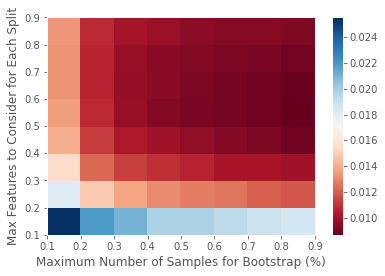

In [9]:
xplot=list(param_grid['max_samples'])
yplot=list(param_grid['max_features'])
zplot=-1*grid_search_bag.cv_results_['mean_test_score'].reshape(len(yplot),-1) # NOTE: it is negated! (Sklearn convention)
plt.pcolor(xplot,yplot,zplot,cmap='RdBu')
plt.colorbar();
plt.xlabel('Maximum Number of Samples for Bootstrap (%)');
plt.ylabel('Max Features to Consider for Each Split');

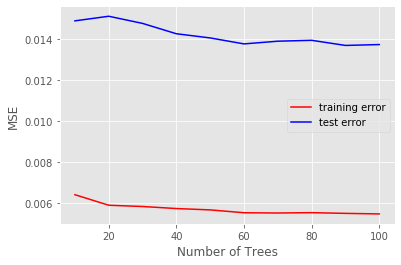

In [10]:
number_estimators = range(10, 110,10)
train_error = []
test_error = []
for i in number_estimators:
    bagging.set_params(n_estimators=i,bootstrap=True,oob_score = False,n_jobs=-1,random_state=0,\
                       max_samples=0.6,max_features=0.5)
    bagging.fit(x_train, y_train)
    train_error.append(metrics.mean_squared_error(y_train, bagging.predict(x_train))) 
    test_error.append(metrics.mean_squared_error(y_test, bagging.predict(x_test))) 
import matplotlib.pyplot as plt
plt.plot(number_estimators, train_error, c='red', label='training error')
plt.plot(number_estimators, test_error, c='blue', label='test error')
plt.ylabel('MSE')
plt.xlabel('Number of Trees')
plt.legend()
plt.show()

# Random Forests

In [11]:
# Random Forest is bagging but each split is capped by randomly chosen features

# n_estimator = number of trees built/bagged
# bootstrap = True to sample with replacement.
# max_samples = percent of the dataset for bootstrapping
# max_features = number of features to draw from X to train for each bootstrap sample.
# oob_score = True, whether to use out of bag sample to estimate error
# warm_start = When set to True, reuse the solution of the previous call to fit and add more estimators to the ensemble, otherwise, just fit a whole new ensemble.
# n_jobs = -1. The number of jobs to run in parallel. -1 means to run all processors
randomForest = ensemble.RandomForestRegressor()
randomForest.set_params(n_estimators=100,criterion="mse",\
                        min_samples_leaf=2,min_samples_split=2,\
                        max_depth = None, bootstrap=True,\
                        max_features=5,\
                        oob_score = True,n_jobs=-1)
randomForest.fit(x_train,y_train)
print("The training error of bagging forest is: {0:.3f}".format(metrics.mean_squared_error(y_train, randomForest.predict(x_train))))
print("The test error of bagging forest is: {0:.3f}".format(metrics.mean_squared_error(y_test, randomForest.predict(x_test))))


The training error of bagging forest is: 0.005
The test error of bagging forest is: 0.018


# Grid Search CV - Random Forests

In [12]:
param_grid = {
    'max_depth' : range(5,20),\
    'max_features': range(5,20)
}
randomForest = ensemble.RandomForestRegressor()
grid_search_forest = GridSearchCV(ensemble.RandomForestRegressor(n_estimators=100,criterion="mse",\
                                                                 min_samples_leaf=2,min_samples_split=2,\
                                                                 bootstrap=True,oob_score = True,n_jobs=-1),\
                                  param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1,refit=True)
%time grid_search_forest.fit(x_train, y_train)

# Print results    
print('Best parameters: {}'.format(grid_search_forest.best_params_))
print('Best MSE Score: {0:.3f}'.format(-grid_search_forest.best_score_)) # NOTE: it is negated! (Sklearn convention)
print('MSE Score on training data set (using best parameters): {0:.3f}'.format(-grid_search_forest.score(x_train, y_train)))
print('MSE Score on test data set (using best parameters): {0:.3f}'.format(-grid_search_forest.score(x_test, y_test)))

CPU times: user 7.89 s, sys: 1.97 s, total: 9.85 s
Wall time: 1min 11s
Best parameters: {'max_depth': 15, 'max_features': 19}
Best MSE Score: 0.008
MSE Score on training data set (using best parameters): 0.003
MSE Score on test data set (using best parameters): 0.012


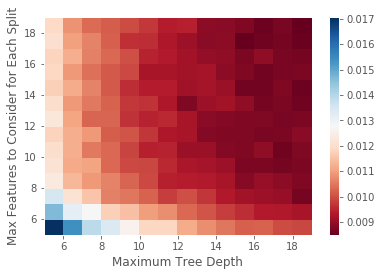

In [13]:
xplot=list(param_grid['max_depth'])
yplot=list(param_grid['max_features'])
zplot=-1*grid_search_forest.cv_results_['mean_test_score'].reshape(len(yplot),-1) # NOTE: it is negated! (Sklearn convention)
plt.pcolor(xplot,yplot,zplot,cmap='RdBu')
plt.colorbar();
plt.xlabel('Maximum Tree Depth');
plt.ylabel('Max Features to Consider for Each Split');

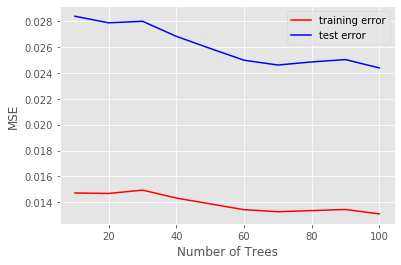

In [14]:
number_estimators = range(10,110,10)
train_error = []
test_error = []
for i in number_estimators:
    randomForest.set_params(n_estimators=i,criterion="mse",bootstrap=True,oob_score = False,n_jobs=-1,random_state=0,\
                       max_depth=5,max_features=5)
    randomForest.fit(x_train, y_train)
    train_error.append(metrics.mean_squared_error(y_train, randomForest.predict(x_train))) 
    test_error.append(metrics.mean_squared_error(y_test, randomForest.predict(x_test))) 
import matplotlib.pyplot as plt
plt.plot(number_estimators, train_error, c='red', label='training error')
plt.plot(number_estimators, test_error, c='blue', label='test error')
plt.ylabel('MSE')
plt.xlabel('Number of Trees')
plt.legend()
plt.show()

# Feature Importance from Random Forest

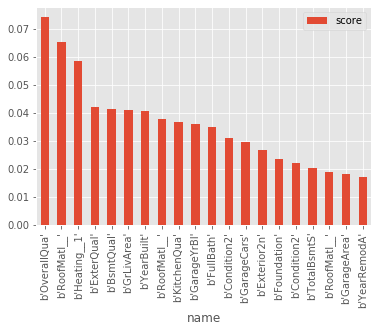

In [15]:
feature_importance = list(zip(x_train.columns, randomForest.feature_importances_))
dtype = [('feature', 'S10'), ('importance', 'float')]
feature_importance = np.array(feature_importance, dtype=dtype)
feature_sort = np.sort(feature_importance, order='importance')[::-1]
name, score = zip(*list(feature_sort))
pd.DataFrame({'name':name,'score':score})[:20].plot.bar(x='name', y='score')

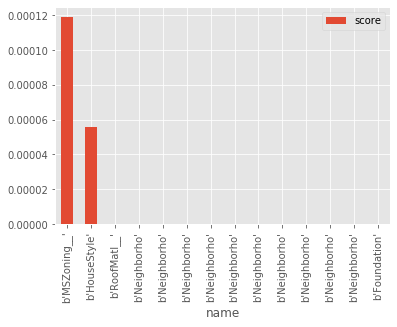

In [16]:
feature_importance = list(zip(x_train.columns, randomForest.feature_importances_))
dtype = [('feature', 'S10'), ('importance', 'float')]
feature_importance = np.array(feature_importance, dtype=dtype)
feature_sort = np.sort(feature_importance, order='importance')[::-1]
name, score = zip(*list(feature_sort))
pd.DataFrame({'name':name,'score':score})[-15:-1].plot.bar(x='name', y='score')

# Boosts of all sorts

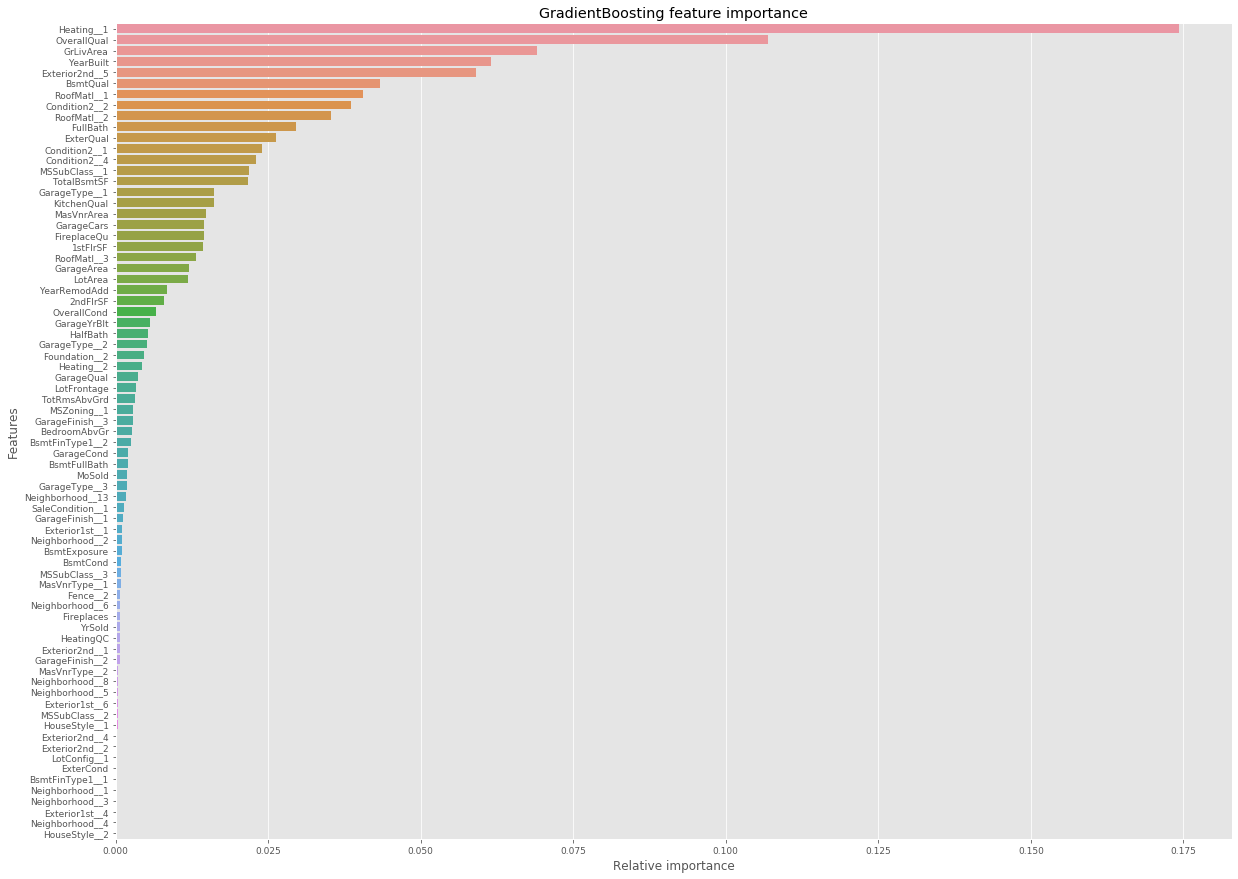

In [17]:
model=ensemble.GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10,
                                   loss='huber', random_state=5)
model.fit(x_train, y_train)

# Sort feature importances from GBC model trained earlier
indices = np.argsort(model.feature_importances_)[::-1]
indices = indices[:75]

# Visualise these with a barplot
plt.subplots(figsize=(20, 15))
g = sns.barplot(y=x_train.columns[indices], x = model.feature_importances_[indices], orient='h')
g.set_xlabel("Relative importance",fontsize=12)
g.set_ylabel("Features",fontsize=12)
g.tick_params(labelsize=9)
g.set_title("GradientBoosting feature importance");

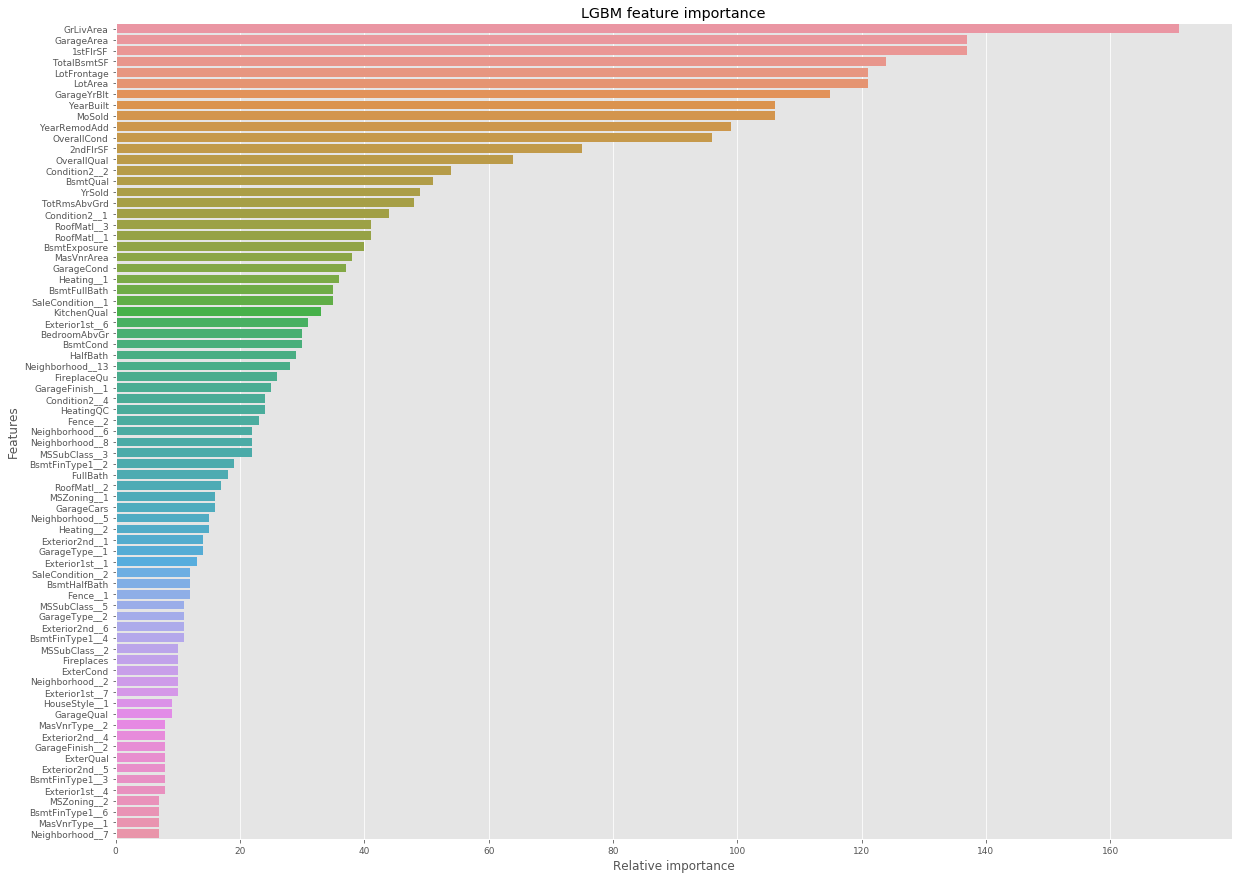

In [18]:
model = lgb.LGBMRegressor(objective='regression', num_leaves=5,
                         learning_rate=0.05, n_estimators=720,
                         max_bin=55, bagging_fraction=0.8,
                         bagging_freq=5, feature_fraction=0.2319,
                         feature_fraction_seed=9, bagging_seed=9,
                         min_data_in_leaf=6, min_sum_hessian_in_leaf=11)
model.fit(x_train, y_train)

# Sort feature importances from GBC model trained earlier
indices = np.argsort(model.feature_importances_)[::-1]
indices = indices[:75]

# Visualise these with a barplot
plt.subplots(figsize=(20, 15))
g = sns.barplot(y=x_train.columns[indices], x = model.feature_importances_[indices], orient='h')
g.set_xlabel("Relative importance",fontsize=12)
g.set_ylabel("Features",fontsize=12)
g.tick_params(labelsize=9)
g.set_title("LGBM feature importance");

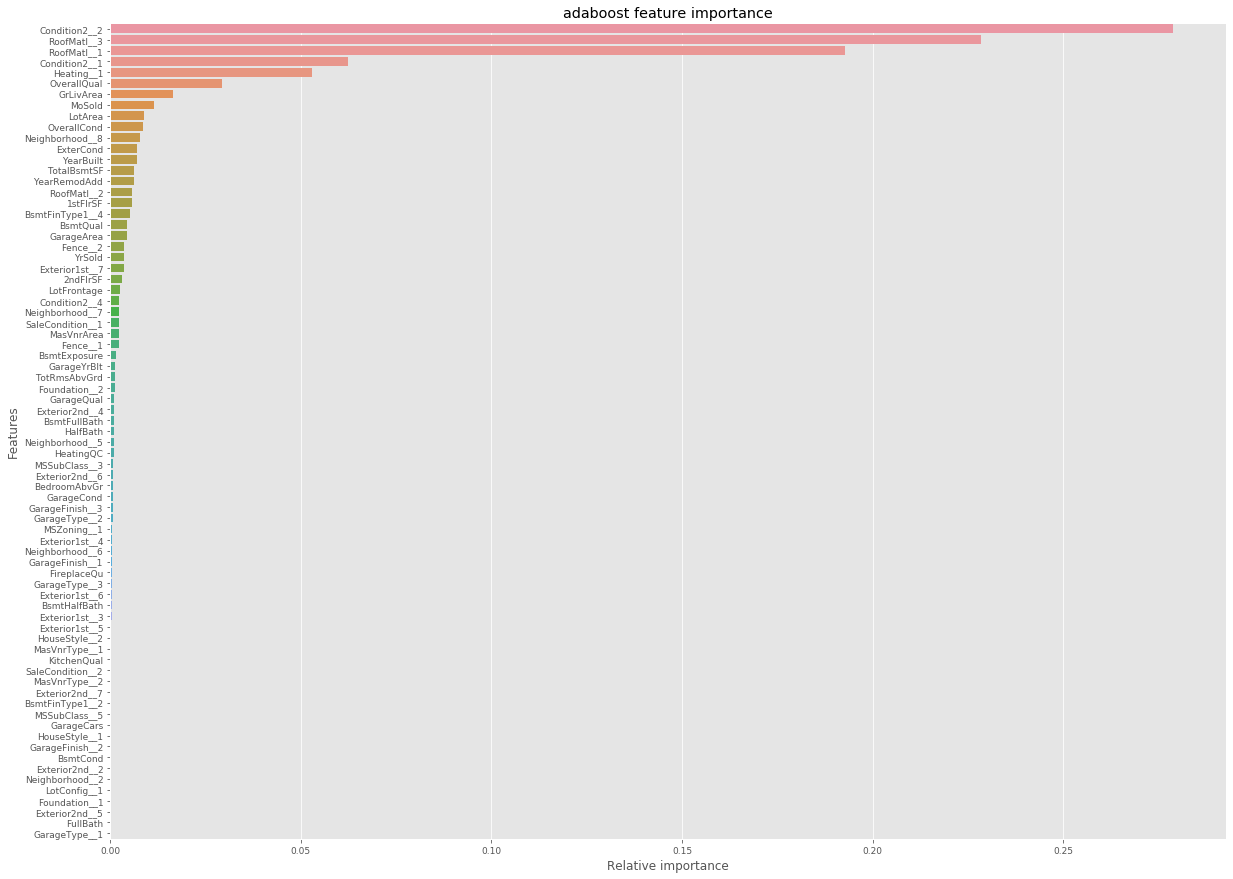

In [19]:
# Fit regression model
noboost = tree.DecisionTreeRegressor(max_depth=4)

adaboost = ensemble.AdaBoostRegressor(tree.DecisionTreeRegressor(max_depth=4),
                          n_estimators=300, random_state=0)

noboost.fit(x_train, y_train)
adaboost.fit(x_train, y_train)

# Sort feature importances from GBC model trained earlier
indices = np.argsort(adaboost.feature_importances_)[::-1]
indices = indices[:75]

# Visualise these with a barplot
plt.subplots(figsize=(20, 15))
g = sns.barplot(y=x_train.columns[indices], x = adaboost.feature_importances_[indices], orient='h')
g.set_xlabel("Relative importance",fontsize=12)
g.set_ylabel("Features",fontsize=12)
g.tick_params(labelsize=9)
g.set_title("adaboost feature importance");

/home/auscheng/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[23:49:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


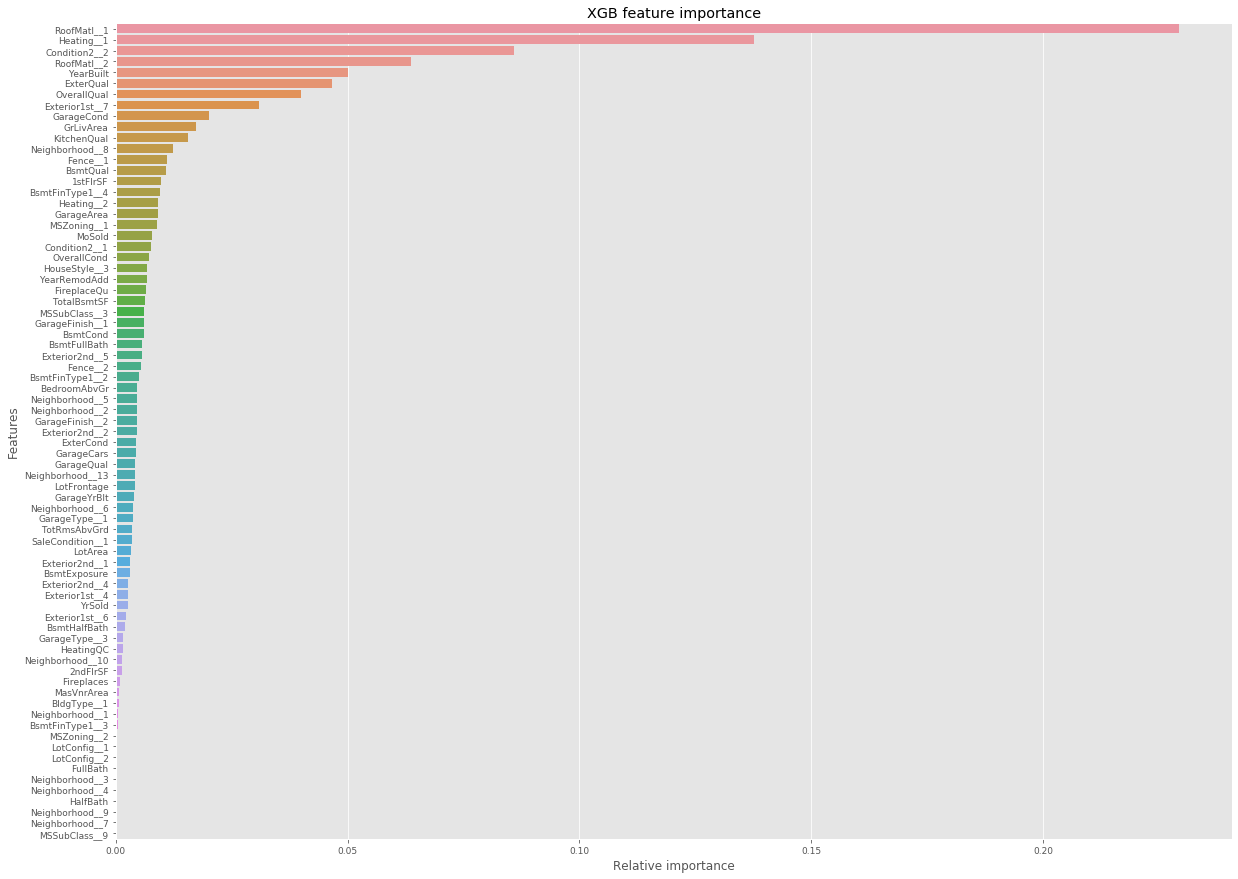

In [20]:
import xgboost as xgb

model = xgb.XGBRegressor()
model.fit(x_train, y_train)

# Sort feature importances from GBC model trained earlier
indices = np.argsort(model.feature_importances_)[::-1]
indices = indices[:75]

# Visualise these with a barplot
plt.subplots(figsize=(20, 15))
g = sns.barplot(y=x_train.columns[indices], x = model.feature_importances_[indices], orient='h')
g.set_xlabel("Relative importance",fontsize=12)
g.set_ylabel("Features",fontsize=12)
g.tick_params(labelsize=9)
g.set_title("XGB feature importance");

### But one-hot encoding also presents two problems that are more particular to tree-based models:

### The resulting sparsity virtually ensures that continuous variables are assigned higher feature importance.
### A single level of a categorical variable must meet a very high bar in order to be selected for splitting early in the tree building. This can degrade predictive performance.

### One-hot encoding categorical variables with high cardinality (high uniqueness, low repeats) can cause inefficiency in tree-based ensembles. Continuous variables will be given more importance than the dummy variables by the algorithm which will obscure the order of feature importance resulting in poorer performance. This is because a successful split in categorical variables with high cardinality is less likely to return a higher node purity 

### By one-hot encoding a categorical variable, we are inducing sparsity into the dataset which is undesirable.
### From the splitting algorithm’s point of view, all the dummy variables are independent. If the tree decides to make a split on one of the dummy variables, the gain in purity per split is very marginal. As a result, the tree is very unlikely to select one of the dummy variables closer to the root.

In [21]:
# def cross_validate_best_known():
#     '''
#         import and clean the tractor data, then do a corss validation on each of the three models we are
#         training here. A RandomForest, a GradientBoost, and an AdaBoost backed by a DecisionTree. Print
#         the scores.

#         The parameters we're using here are the "best" that we've found so far using a grid search.
#     '''
#     tractor_data = pd.read_csv('data/train.csv')
#     tractor_data = cln.clean_all(tractor_data)
#     X = tractor_data
#     y = tractor_data.pop('SalePrice')

#     rf = RandomForestRegressor(max_features=2, min_samples_split=4, n_estimators=50, min_samples_leaf=2)
#     gb = GradientBoostingRegressor(loss='quantile', learning_rate=0.0001, n_estimators=50, max_features='log2', min_samples_split=2, max_depth=1)
#     ada_tree_backing = DecisionTreeRegressor(max_features='sqrt', splitter='random', min_samples_split=4, max_depth=3)
#     ab = AdaBoostRegressor(ada_tree_backing, learning_rate=0.1, loss='square', n_estimators=1000)

#     validate.cross_v_scores([rf, gb, ab], X, y)
#     # RandomForestRegressor -- RMLSE: -0.596797712098, R2: 0.0272065373946
#     # GradientBoostingRegressor -- RMLSE: -0.996134592541, R2: -2.37202164829
#     # AdaBoostRegressor -- RMLSE: -0.706385708459, R2: -0.103966980393 